In [199]:
import pandas as pd
import numpy as np
from geonamescache import GeonamesCache
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from unidecode import unidecode

In [264]:
df = pd.read_csv('headlines_cities.csv')

In [265]:
df.head(20)

,headline,countries,cities
0,Zika Outbreak Hits Miami,NaN,Miami
1,Could Zika Reach New York City?,NaN,New York City
2,First Case of Zika in Miami Beach,NaN,Miami Beach
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas
5,Trinidad confirms first Zika case,NaN,Trinidad
6,Zika Concerns are Spreading in Houston,NaN,Houston
7,Geneve Scientists Battle to Find Cure,NaN,Geneve
8,The CDC in Atlanta is Growing Worried,NaN,Atlanta
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo


In [266]:
df.shape

(650, 3)

In [267]:
df = df.drop('countries', 1)

In [268]:
df = df[df.cities.notnull()].reset_index(drop=True)
df.shape

(626, 2)

GEONAMESCACHE

In [246]:
gc = GeonamesCache()

In [247]:
continent_dict = gc.get_continents()

In [248]:
continent_dict['EU'].keys()

dict_keys(['lng', 'geonameId', 'timezone', 'bbox', 'toponymName', 'asciiName', 'astergdem', 'fcl', 'population', 'wikipediaURL', 'adminName5', 'srtm3', 'adminName4', 'adminName3', 'alternateNames', 'cc2', 'adminName2', 'name', 'fclName', 'fcodeName', 'adminName1', 'lat', 'fcode', 'continentCode'])

In [249]:
latitude = continent_dict['EU']['lat']
longitude = continent_dict['EU']['lng']
print('EUROPE\nlatitude: {}, longitude: {}'.format(latitude,longitude))

EUROPE
latitude: 48.69096, longitude: 9.14062


In [250]:
gc.get_countries_by_names?

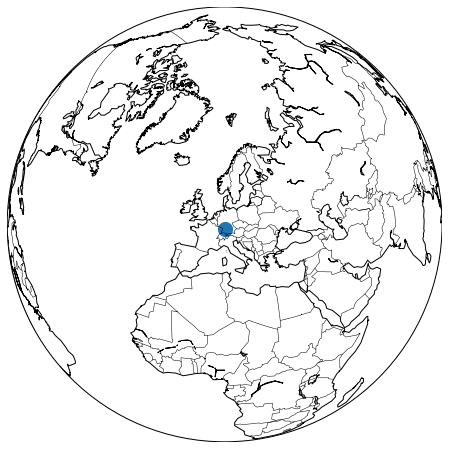

In [251]:
fig = plt.figure(figsize=(12, 8))
map_plotter = Basemap(projection='ortho',lat_0=50, lon_0=9)
map_plotter.scatter([float(longitude)], [float(latitude)], latlon=True, s=200)
map_plotter.drawcoastlines()
map_plotter.drawcountries()
plt.show()


In [252]:
result = gc.get_countries_by_names()['United States']
result

{'geonameid': 6252001,
 'name': 'United States',
 'iso': 'US',
 'iso3': 'USA',
 'isonumeric': 840,
 'fips': 'US',
 'continentcode': 'NA',
 'capital': 'Washington',
 'areakm2': 9629091,
 'population': 310232863,
 'tld': '.us',
 'currencycode': 'USD',
 'currencyname': 'Dollar',
 'phone': '1',
 'postalcoderegex': '^\\d{5}(-\\d{4})?$',
 'languages': 'en-US,es-US,haw,fr',
 'neighbours': 'CA,MX,CU'}

In [253]:
cities = gc.get_cities()
num_cities = len(cities)
print(f"GeoNamesCache holds data for {num_cities} total cities")
city_id = list(cities.keys())[0]
print(cities[city_id])

GeoNamesCache holds data for 24336 total cities
{'geonameid': 3041563, 'name': 'Andorra la Vella', 'latitude': 42.50779, 'longitude': 1.52109, 'countrycode': 'AD', 'population': 20430, 'timezone': 'Europe/Andorra', 'admin1code': '07'}


In [254]:
df_cities = pd.DataFrame(cities).T
df_cities.reset_index(drop=True, inplace=True)

In [255]:
df_cities.head()

,geonameid,name,latitude,longitude,countrycode,population,timezone,admin1code
0,3041563,Andorra la Vella,42.5078,1.52109,AD,20430,Europe/Andorra,07
1,290594,Umm Al Quwain City,25.5647,55.5552,AE,62747,Asia/Dubai,07
2,291074,Ras Al Khaimah City,25.7895,55.9432,AE,351943,Asia/Dubai,05
3,291580,Zayed City,23.6542,53.7052,AE,63482,Asia/Dubai,01
4,291696,Khawr Fakkān,25.3313,56.342,AE,40677,Asia/Dubai,06


In [256]:
for i,name in enumerate(df_cities.name):
    name = unidecode(name)
    df_cities.name.iloc[i] = name

In [257]:
df_cities[df_cities.name==city]

,geonameid,name,latitude,longitude,countrycode,population,timezone,admin1code
21581,4741752,Wichita Falls,33.9137,-98.4934,US,104710,America/Chicago,TX


In [258]:
(gc.get_cities_by_name('San Francisco')[0]).values()

dict_values([{'geonameid': 3837675, 'name': 'San Francisco', 'latitude': -31.42797, 'longitude': -62.08266, 'countrycode': 'AR', 'population': 59062, 'timezone': 'America/Argentina/Cordoba', 'admin1code': '05'}])

In [259]:
lat, lng, code = [],[],[]

for city in df.cities:
    sf = df_cities[df_cities.name==city]
    max_pop = sf.population.max()
    lat.append(list(sf[sf.population==max_pop]['latitude'].values)[0])
    lng.append(list(sf[sf.population==max_pop]['longitude'].values)[0])
    code.append(list(sf[sf.population==max_pop]['countrycode'].values)[0])

In [260]:
df['latitude'] = lat
df['longitude'] = lng
df['countrycode'] = code

In [261]:
df.head()

,headline,cities,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami Beach,25.79065,-80.13005,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US


In [262]:
df.to_csv('headlines_with_coordinates.csv')